In [182]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely import geometry as gm

In [183]:
buildings = gpd.read_file("export.geojson")
buildings=buildings.to_crs('epsg:32644')

In [184]:
buildings.columns

Index(['id', '@id', 'amenity', 'building', 'building:levels',
       'internet_access', 'internet_access:fee', 'name', 'shop', 'tourism',
       'geometry'],
      dtype='object')

In [185]:
buildings

,id,@id,amenity,building,building:levels,internet_access,internet_access:fee,name,shop,tourism,geometry
0,way/343713744,way/343713744,None,yes,None,None,None,None,None,None,"POLYGON ((702637.164 3048685.461, 702634.631 3..."
1,way/343714103,way/343714103,None,yes,None,None,None,None,None,None,"POLYGON ((702671.092 3050235.181, 702669.971 3..."
2,way/343714621,way/343714621,None,yes,None,None,None,None,None,None,"POLYGON ((702739.545 3050229.998, 702735.007 3..."
3,way/343714739,way/343714739,None,yes,None,None,None,None,None,None,"POLYGON ((702873.991 3050334.479, 702870.406 3..."
4,way/343714785,way/343714785,None,yes,None,None,None,None,None,None,"POLYGON ((702866.200 3050309.322, 702863.749 3..."
...,...,...,...,...,...,...,...,...,...,...,...
2353,way/1232627221,way/1232627221,None,yes,None,None,None,None,None,None,"POLYGON ((702569.026 3048819.611, 702566.052 3..."
2354,way/1232627222,way/1232627222,None,yes,None,None,None,None,None,None,"POLYGON ((702574.963 3048817.282, 702571.965 3..."
2355,way/1232627223,way/1232627223,None,yes,None,None,None,None,None,None,"POLYGON ((702797.302 3048525.082, 702786.709 3..."
2356,way/1232627224,way/1232627224,None,yes,None,None,None,None,None,None,"POLYGON ((702806.681 3048448.647, 702808.692 3..."


In [187]:
# buildings['weight'] = -1
# buildings

In [188]:
# rivers = gpd.read_file("Datas/river/river.shp")
# rivers=rivers.to_crs('epsg:32644')
# columns_to_drop = ['tunnel','layer', 'name', 'boat']
# rivers = rivers.drop(columns_to_drop, axis=1)
# rivers

In [189]:
columns_to_drop = [ 'amenity', 'building', 'building:levels',
       'internet_access', 'internet_access:fee', 'name', 'shop', 'tourism']
buildings = buildings.drop(columns_to_drop, axis = 1)

In [190]:
# rivers['weight'] = -1
# rivers

In [191]:
# buildings = buildings.rename(columns={'building':'waterorbuild'})
# buildings

In [192]:
# mapping = {'yes':'building'}

# # Replace values in the 'waterorbuild' column
# buildings['waterorbuild'] = buildings['waterorbuild'].replace(mapping)
# buildings

In [193]:
# rivers = rivers.rename(columns={'waterway': 'waterorbuild'})


In [194]:
# mapping = {'river': 'water', 'ditch': 'water', 'stream': 'water', 'drain': 'water'}

# # Replace values in the 'waterorbuild' column
# rivers['waterorbuild'] = rivers['waterorbuild'].replace(mapping)
# rivers



<Axes: >

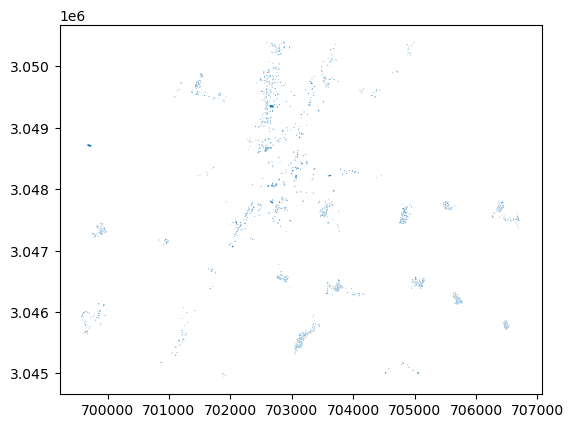

In [195]:
buildings.plot()

In [196]:
# rivers.plot()

In [197]:
buildings.columns

Index(['id', '@id', 'geometry'], dtype='object')

In [198]:
# rivers.columns

In [199]:
buildings

,id,@id,geometry
0,way/343713744,way/343713744,"POLYGON ((702637.164 3048685.461, 702634.631 3..."
1,way/343714103,way/343714103,"POLYGON ((702671.092 3050235.181, 702669.971 3..."
2,way/343714621,way/343714621,"POLYGON ((702739.545 3050229.998, 702735.007 3..."
3,way/343714739,way/343714739,"POLYGON ((702873.991 3050334.479, 702870.406 3..."
4,way/343714785,way/343714785,"POLYGON ((702866.200 3050309.322, 702863.749 3..."
...,...,...,...
2353,way/1232627221,way/1232627221,"POLYGON ((702569.026 3048819.611, 702566.052 3..."
2354,way/1232627222,way/1232627222,"POLYGON ((702574.963 3048817.282, 702571.965 3..."
2355,way/1232627223,way/1232627223,"POLYGON ((702797.302 3048525.082, 702786.709 3..."
2356,way/1232627224,way/1232627224,"POLYGON ((702806.681 3048448.647, 702808.692 3..."


In [200]:
geometry = buildings.geometry

# Convert polygon to latitude and longitude
def polygon_to_lat_lon(polygon):
    lon, lat = polygon.exterior.coords.xy
    return [(x, y) for x, y in zip(lon, lat)]

# Apply the function to each polygon in the geometry column
buildings['lat_lon'] = geometry.apply(polygon_to_lat_lon)

In [201]:
# geometry = rivers.geometry
# def linestring_to_lat_lon(linestring):
#     lon, lat = linestring.xy
#     return [(x, y) for x, y in zip(lon, lat)]

# # Apply the function to each LineString in the geometry column
# rivers['lat_lon'] = geometry.apply(linestring_to_lat_lon)

In [202]:
# rivers

In [203]:
# data = gpd.GeoDataFrame(pd.concat([buildings, rivers], ignore_index=True))
# data

In [204]:
data = buildings

In [206]:
data

,id,@id,geometry,lat_lon
0,way/343713744,way/343713744,"POLYGON ((702637.164 3048685.461, 702634.631 3...","[(702637.164244724, 3048685.4606274483), (7026..."
1,way/343714103,way/343714103,"POLYGON ((702671.092 3050235.181, 702669.971 3...","[(702671.0916883941, 3050235.180685942), (7026..."
2,way/343714621,way/343714621,"POLYGON ((702739.545 3050229.998, 702735.007 3...","[(702739.5446431215, 3050229.9982660096), (702..."
3,way/343714739,way/343714739,"POLYGON ((702873.991 3050334.479, 702870.406 3...","[(702873.9910772757, 3050334.4790355456), (702..."
4,way/343714785,way/343714785,"POLYGON ((702866.200 3050309.322, 702863.749 3...","[(702866.1999788482, 3050309.3220992666), (702..."
...,...,...,...,...
2353,way/1232627221,way/1232627221,"POLYGON ((702569.026 3048819.611, 702566.052 3...","[(702569.0262362584, 3048819.6109081805), (702..."
2354,way/1232627222,way/1232627222,"POLYGON ((702574.963 3048817.282, 702571.965 3...","[(702574.9627792629, 3048817.281881024), (7025..."
2355,way/1232627223,way/1232627223,"POLYGON ((702797.302 3048525.082, 702786.709 3...","[(702797.3023254189, 3048525.081839312), (7027..."
2356,way/1232627224,way/1232627224,"POLYGON ((702806.681 3048448.647, 702808.692 3...","[(702806.6810636632, 3048448.6473995824), (702..."


In [207]:
print(data['lat_lon'].head())


0    [(702637.164244724, 3048685.4606274483), (7026...
1    [(702671.0916883941, 3050235.180685942), (7026...
2    [(702739.5446431215, 3050229.9982660096), (702...
3    [(702873.9910772757, 3050334.4790355456), (702...
4    [(702866.1999788482, 3050309.3220992666), (702...
Name: lat_lon, dtype: object


0    POINT (702655.484 3048672.133)
1    POINT (702678.828 3050227.654)
2    POINT (702743.135 3050221.379)
3    POINT (702876.904 3050322.162)
4    POINT (702869.808 3050301.772)
Name: centroid, dtype: geometry


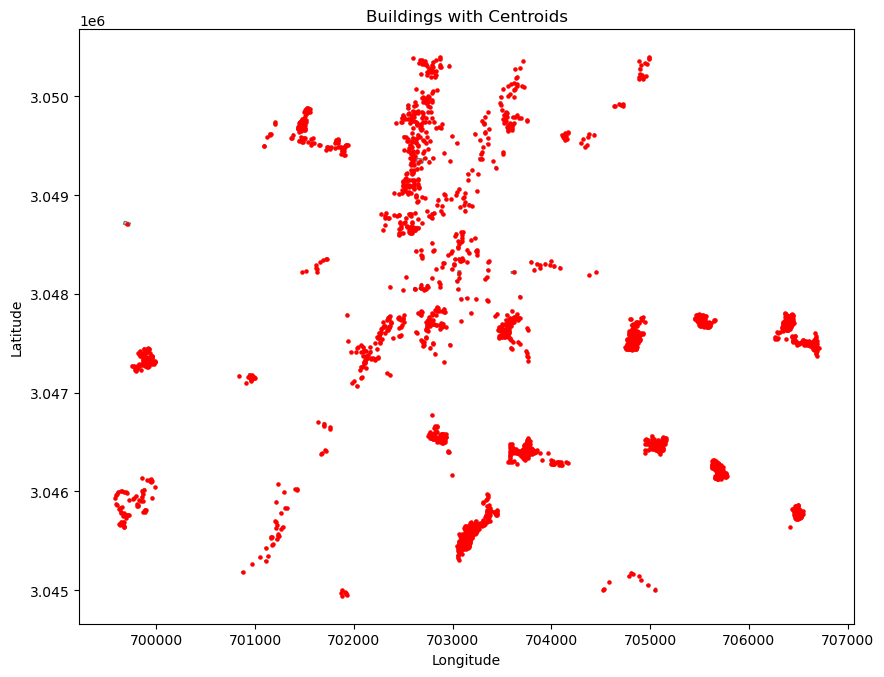

In [208]:
buildings['centroid'] = buildings['geometry'].centroid

# Now, 'centroid' column contains the representative point for each building
# You can access it like this:
print(buildings['centroid'].head())
fig, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
buildings['centroid'].plot(ax=ax, color='red', markersize=5)
plt.title('Buildings with Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [209]:
buildings

,id,@id,geometry,lat_lon,centroid
0,way/343713744,way/343713744,"POLYGON ((702637.164 3048685.461, 702634.631 3...","[(702637.164244724, 3048685.4606274483), (7026...",POINT (702655.484 3048672.133)
1,way/343714103,way/343714103,"POLYGON ((702671.092 3050235.181, 702669.971 3...","[(702671.0916883941, 3050235.180685942), (7026...",POINT (702678.828 3050227.654)
2,way/343714621,way/343714621,"POLYGON ((702739.545 3050229.998, 702735.007 3...","[(702739.5446431215, 3050229.9982660096), (702...",POINT (702743.135 3050221.379)
3,way/343714739,way/343714739,"POLYGON ((702873.991 3050334.479, 702870.406 3...","[(702873.9910772757, 3050334.4790355456), (702...",POINT (702876.904 3050322.162)
4,way/343714785,way/343714785,"POLYGON ((702866.200 3050309.322, 702863.749 3...","[(702866.1999788482, 3050309.3220992666), (702...",POINT (702869.808 3050301.772)
...,...,...,...,...,...
2353,way/1232627221,way/1232627221,"POLYGON ((702569.026 3048819.611, 702566.052 3...","[(702569.0262362584, 3048819.6109081805), (702...",POINT (702570.136 3048812.853)
2354,way/1232627222,way/1232627222,"POLYGON ((702574.963 3048817.282, 702571.965 3...","[(702574.9627792629, 3048817.281881024), (7025...",POINT (702576.106 3048810.906)
2355,way/1232627223,way/1232627223,"POLYGON ((702797.302 3048525.082, 702786.709 3...","[(702797.3023254189, 3048525.081839312), (7027...",POINT (702791.429 3048517.117)
2356,way/1232627224,way/1232627224,"POLYGON ((702806.681 3048448.647, 702808.692 3...","[(702806.6810636632, 3048448.6473995824), (702...",POINT (702814.052 3048445.263)


In [290]:
df = data.to_csv('output.csv', index=False)

In [292]:
df = pd.read_csv('output.csv')

In [293]:
df= df.drop(['id','@id','geometry','lat_lon'],axis = 1)

In [294]:
df['x'] = df['centroid'].str.extract(r'POINT \((\d+.\d+) (\d+.\d+)\)')[0]
df['y'] = df['centroid'].str.extract(r'POINT \((\d+.\d+) (\d+.\d+)\)')[1]

# Converting x and y to numeric values
df['x'] = pd.to_numeric(df['x'])
df['y'] = pd.to_numeric(df['y'])

# Displaying the first few rows with x and y values
print(df[['x', 'y']].head())

               x             y
0  702655.484465  3.048672e+06
1  702678.828365  3.050228e+06
2  702743.134513  3.050221e+06
3  702876.904300  3.050322e+06
4  702869.807578  3.050302e+06


In [295]:
df = df.drop('centroid', axis = 1)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


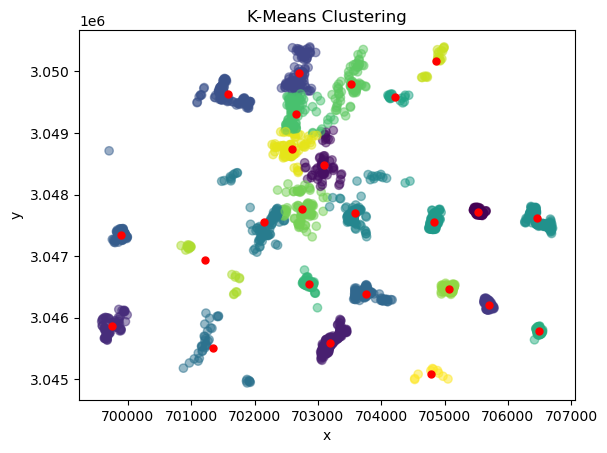

Centroids:
Cluster 1: [ 705536.17081496 3047720.7833524 ]
Cluster 2: [ 703093.65585049 3048485.40958353]
Cluster 3: [ 703194.95358261 3045584.4815551 ]
Cluster 4: [ 699746.6535719  3045864.19454223]
Cluster 5: [ 705695.70638646 3046206.08837979]
Cluster 6: [ 702701.03275271 3049975.68034771]
Cluster 7: [ 701574.76013945 3049629.1106306 ]
Cluster 8: [ 699889.00525795 3047350.40343865]
Cluster 9: [ 703766.10281204 3046391.57047926]
Cluster 10: [ 701341.83607605 3045506.69810377]
Cluster 11: [ 702143.63838991 3047554.71938448]
Cluster 12: [ 703585.65324879 3047701.86450096]
Cluster 13: [ 706463.88944443 3047622.31082118]
Cluster 14: [ 704829.29436886 3047559.93863436]
Cluster 15: [ 704225.01526064 3049582.68255438]
Cluster 16: [ 706491.73845828 3045784.04917881]
Cluster 17: [ 702852.57414967 3046547.47766845]
Cluster 18: [ 702657.20210456 3049314.94657978]
Cluster 19: [ 703524.78204176 3049795.17522636]
Cluster 20: [ 702753.28334994 3047765.85777316]
Cluster 21: [ 705068.2411957  3046472.

In [296]:
df1 = df
k = 25
kmeans = KMeans(n_clusters=k)
kmeans.fit(df1)

# Centroids of the clusters
centroids = kmeans.cluster_centers_

# Plotting the clusters and centroids
plt.scatter(df1['x'], df1['y'], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', c='red', s=100)  # Centroids
plt.title('K-Means Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Centroids coordinates
print("Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: {centroid}")

In [271]:
buffer_zone1=buildings["centroid"].buffer(1000)

<Axes: title={'center': 'Buildings with buffer of 5km'}>

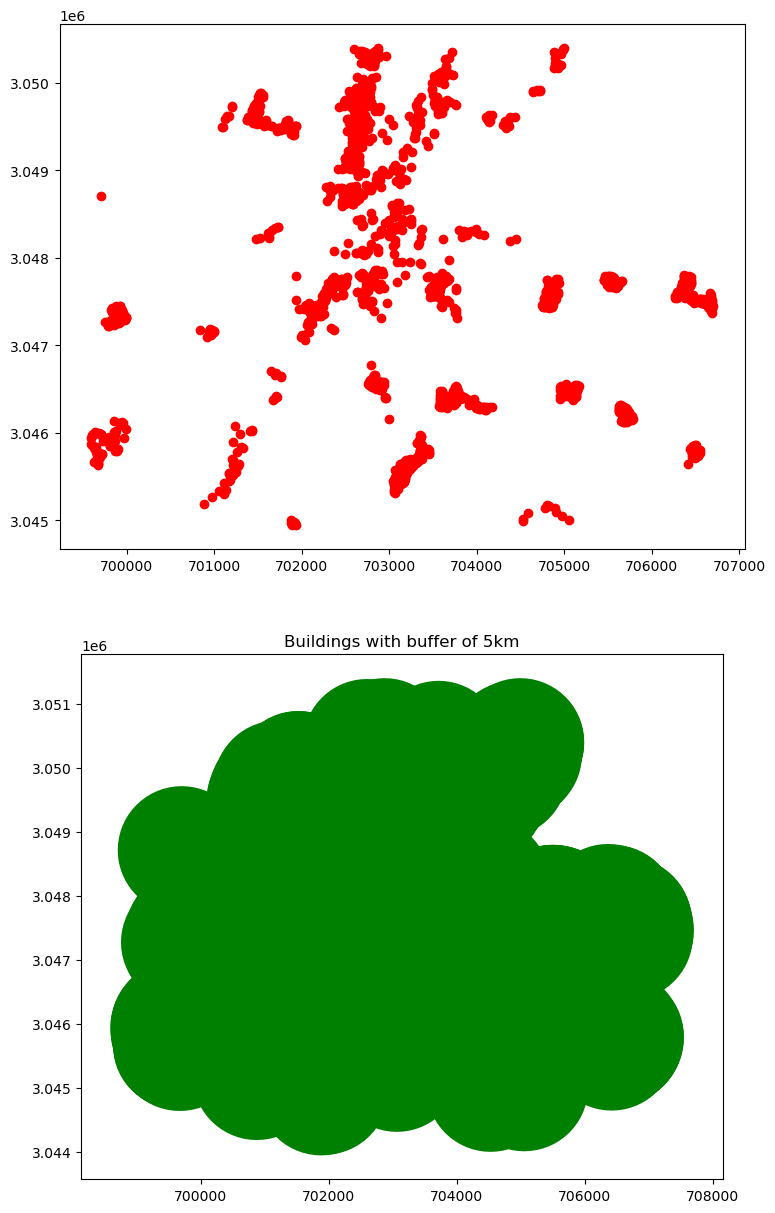

In [272]:
figure,(ax1,ax2)=plt.subplots(2,figsize=(15,15))
plt.title("Buildings with buffer of 5km")
buildings["centroid"].plot(ax=ax1,color='red')
buildings["centroid"].plot(ax=ax2,color='blue')
buffer_zone1.plot(ax=ax2,color='green')

In [273]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming your DataFrame is named 'rivers' and the geometry column is named 'geometry'

# Extract the start point of each LineString
rivers['start_point'] = rivers['geometry'].apply(lambda x: Point(x.coords[0]))

# Extract the end point of each LineString
rivers['end_point'] = rivers['geometry'].apply(lambda x: Point(x.coords[-1]))

# Display the first few rows to verify the changes
print(rivers[['start_point', 'end_point']].head())

                            start_point                          end_point
2578  POINT (-2379561.991 16587443.602)  POINT (-2382168.529 16590316.989)
2579  POINT (-2380985.686 16588491.800)  POINT (-2381007.361 16588671.478)
2580  POINT (-2380922.478 16588472.757)  POINT (-2380992.307 16588577.487)
2581  POINT (-2380987.828 16588481.143)  POINT (-2380985.686 16588491.800)
2582  POINT (-2381295.003 16587284.616)  POINT (-2381324.317 16588060.905)


In [274]:
total_area=sum(buffer_zone1.area)
print(f"Total area covered by buildings is: {total_area} sq km")

Total area covered by buildings is: 7395981340.707971 sq km


In [275]:
buffer_zone1=gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffer_zone1))

In [276]:
buffer_zone1.drop_duplicates(inplace=True)

In [277]:
index = pd.Index(range(0,2358))
buffer_zone1=buffer_zone1.set_index(index)
buffer_zone1

,geometry
0,"POLYGON ((703655.484 3048672.133, 703650.669 3..."
1,"POLYGON ((703678.828 3050227.654, 703674.013 3..."
2,"POLYGON ((703743.135 3050221.379, 703738.319 3..."
3,"POLYGON ((703876.904 3050322.162, 703872.089 3..."
4,"POLYGON ((703869.808 3050301.772, 703864.992 3..."
...,...
2353,"POLYGON ((703570.136 3048812.853, 703565.321 3..."
2354,"POLYGON ((703576.106 3048810.906, 703571.291 3..."
2355,"POLYGON ((703791.429 3048517.117, 703786.613 3..."
2356,"POLYGON ((703814.052 3048445.263, 703809.237 3..."


In [278]:
merged=buffer_zone1.loc[[0]]

In [279]:
for i in range(len(buffer_zone1)):
    merged=gpd.overlay(merged,buffer_zone1.loc[[i]],how='union')
    merged['column']=1
    merged=merged.dissolve()
    merged.crs='epsg:32644'

In [280]:
merged

,geometry,column
0,"POLYGON ((699867.747 3044654.962, 699770.674 3...",1


In [281]:
olygon=gm.Polygon([[699000,3044500],[707000,3044500],[707000,3051000],[699000,3051000]])

In [282]:
d = { 'geometry': [olygon]}
rectangle=gpd.GeoDataFrame(d,crs={'init':'epsg:32644'})

C:\Users\user\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

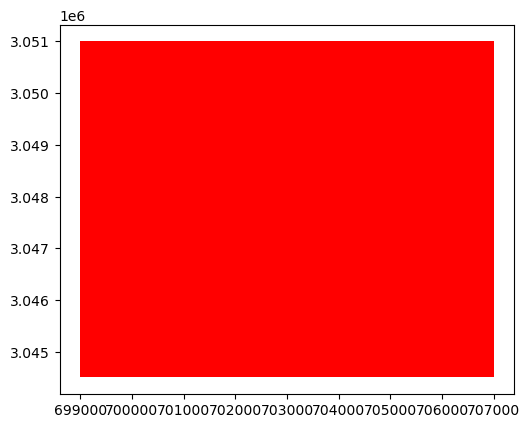

In [283]:
rectangle.plot(color='red')

In [284]:
rectangle=rectangle.to_crs('epsg:32644')

<Axes: >

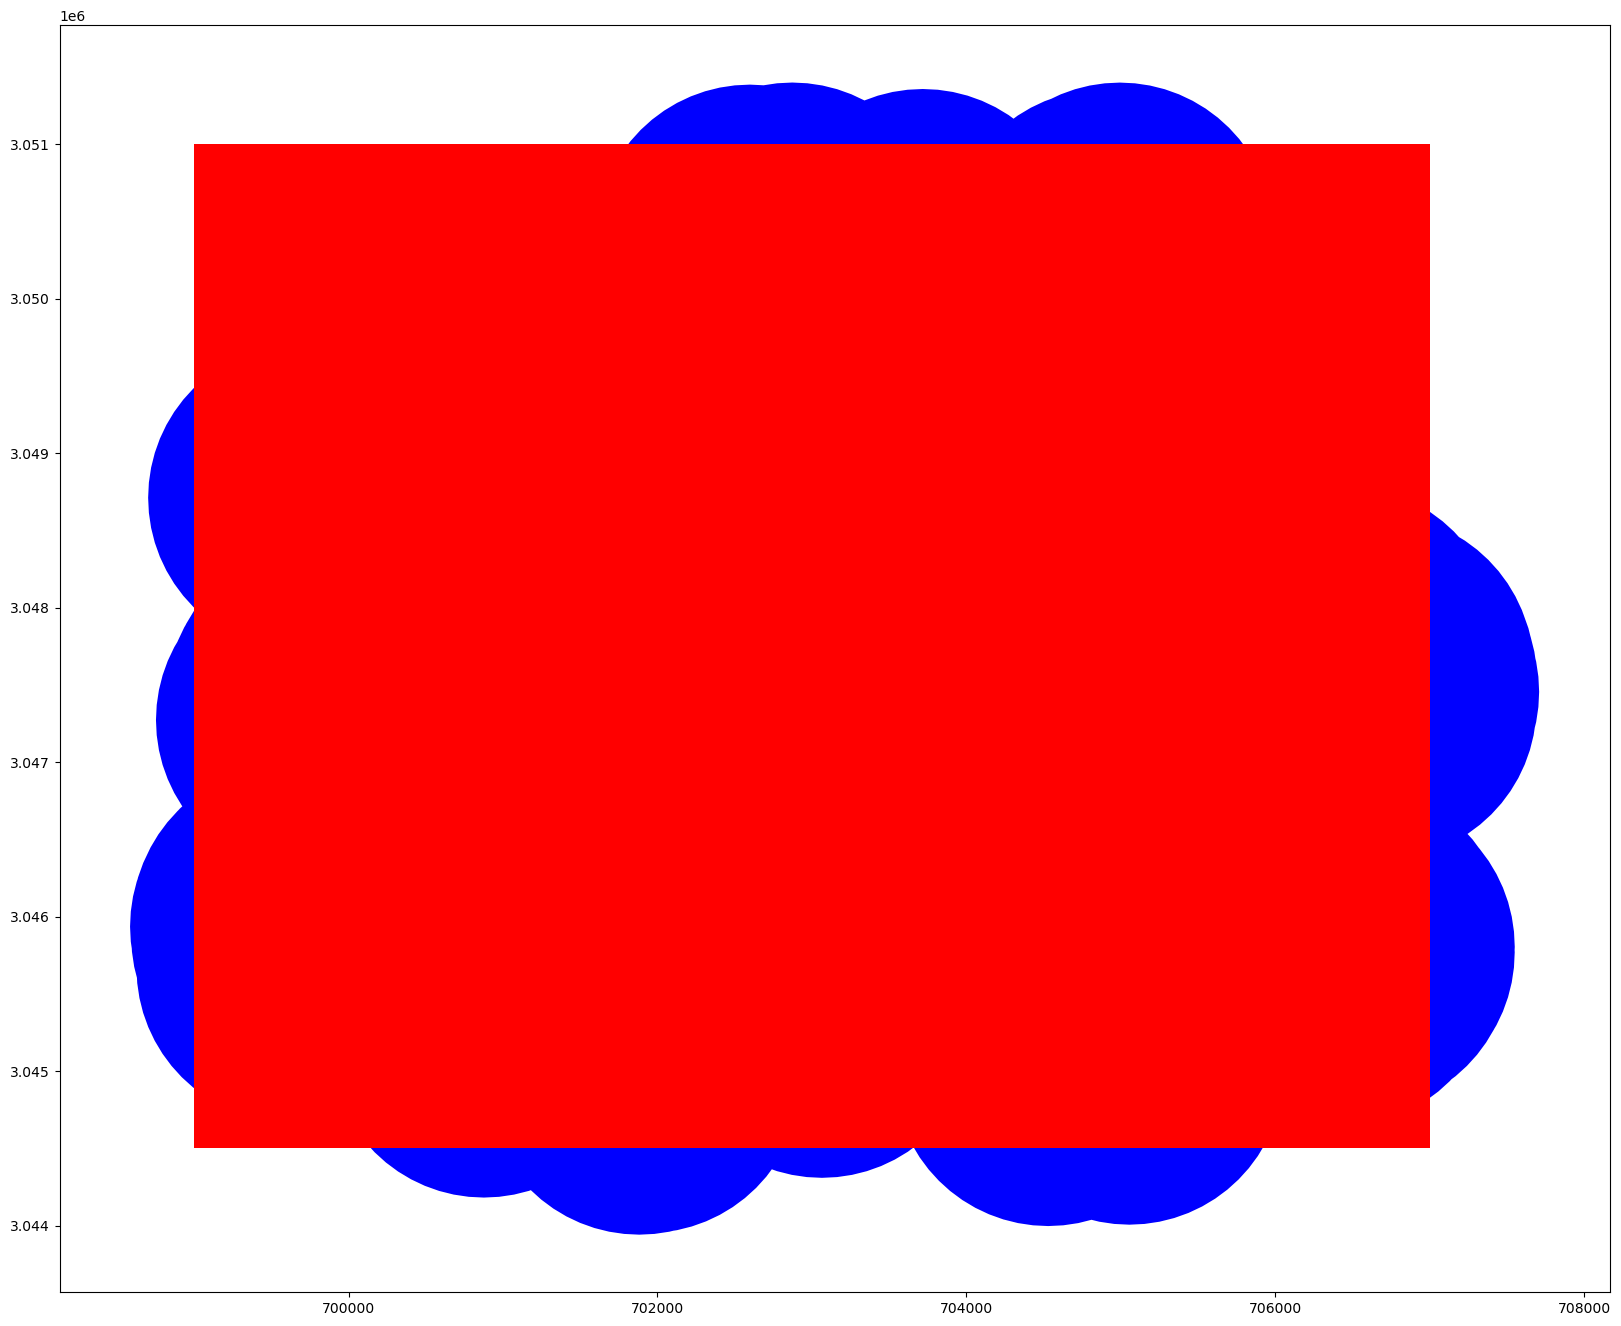

In [285]:
figure,ax=plt.subplots(figsize=(20,20))
merged.plot(ax=ax,color='blue')
rectangle.plot(ax=ax,color="red")

<Axes: >

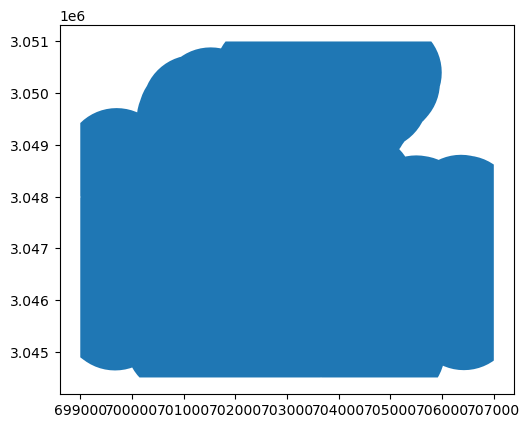

In [286]:
buffer_in_rectangle=gpd.clip(merged,rectangle)
buffer_in_rectangle.plot()

In [287]:
non_buffer=gpd.overlay(rectangle,merged,how='difference')

Text(0.5, 1.0, 'Areas suitable for landfill sites')

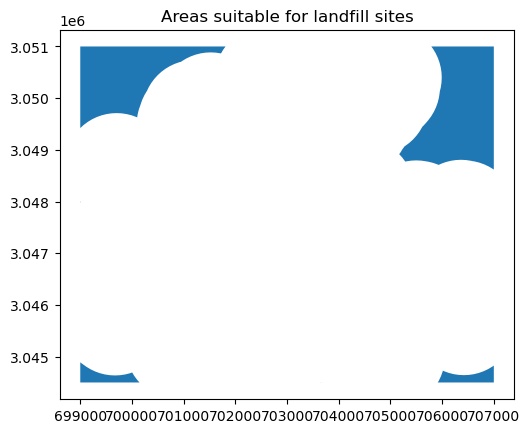

In [289]:
non_buffer.plot()
plt.title("Areas suitable for landfill sites")